Source of Dataset: https://www.kaggle.com/blastchar/telco-customer-churn

### Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

### Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

### Services
- `CustomerID`: A unique ID that identifies each customer.
- `Count`: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
- `Quarter`: The fiscal quarter that the data has been derived from (e.g. Q3).
- `Referred a Friend`: Indicates if the customer has ever referred a friend or family member to this company: Yes, No
- `Number of Referrals`: Indicates the number of referrals to date that the customer has made.
- `Tenure in Months`: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
- `Offer`: Identifies the last marketing offer that the customer accepted, if applicable. Values include None, Offer A, Offer B, Offer C, Offer D, and Offer E.
- `Phone Service`: Indicates if the customer subscribes to home phone service with the company: Yes, No
- `Avg Monthly Long Distance Charges`: Indicates the customer’s average long distance charges, calculated to the end of the quarter specified above.
- `Multiple Lines`: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
- `Internet Service`: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
- `Avg Monthly GB Download`: Indicates the customer’s average download volume in gigabytes, calculated to the end of the quarter specified above.
- `Online Security`: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
- `Online Backup`: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
- `Device Protection Plan`: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
- `Premium Tech Support`: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
- `Streaming TV`: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- `Streaming Movies`: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- `Streaming Music`: Indicates if the customer uses their Internet service to stream music from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- `Unlimited Data`: Indicates if the customer has paid an additional monthly fee to have unlimited data downloads/uploads: Yes, No
- `Contract`: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
- `Paperless Billing`: Indicates if the customer has chosen paperless billing: Yes, No
- `Payment Method`: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
- `Monthly Charge`: Indicates the customer’s current total monthly charge for all their services from the company.
- `Total Charges`: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
- `Total Refunds`: Indicates the customer’s total refunds, calculated to the end of the quarter specified above.
- `Total Extra Data Charges`: Indicates the customer’s total charges for extra data downloads above those specified in their plan, by the end of the quarter specified above.
- `Total Long Distance Charges`: Indicates the customer’s total charges for long distance above those specified in their plan, by the end of the quarter specified above.


# 1. Import Libraries

In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

import seaborn as sns
import matplotlib.pyplot as plt

# 2. Import Dataset

In [4]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", index_col='customerID')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
pd.options.display.max_columns = 100

In [6]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 3. Exploratory Data Analysis (EDA)

### Data Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [8]:
df.shape

(7043, 20)

In [9]:
df['Churn'] = df.Churn.replace({'Yes':1, 'No': 0})

### Data Description

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.265370
std,0.368612,24.559481,30.090047,0.441561
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,0.000000
50%,0.000000,29.000000,70.350000,0.000000
75%,0.000000,55.000000,89.850000,1.000000
max,1.000000,72.000000,118.750000,1.000000


In [11]:
df.describe(include='O')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11


### Check Missing Value

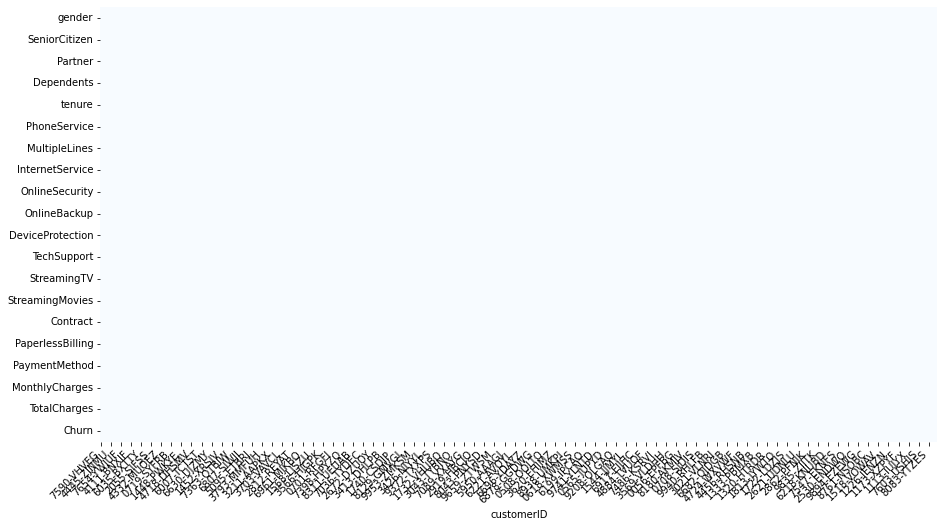

In [12]:
plot_missing_value(df)

```json
After I check the data, The data is not completely clean from missing values. The column of TotalCharge has a missing value that has not been detected
```

In [13]:
df[df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0


In [14]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)

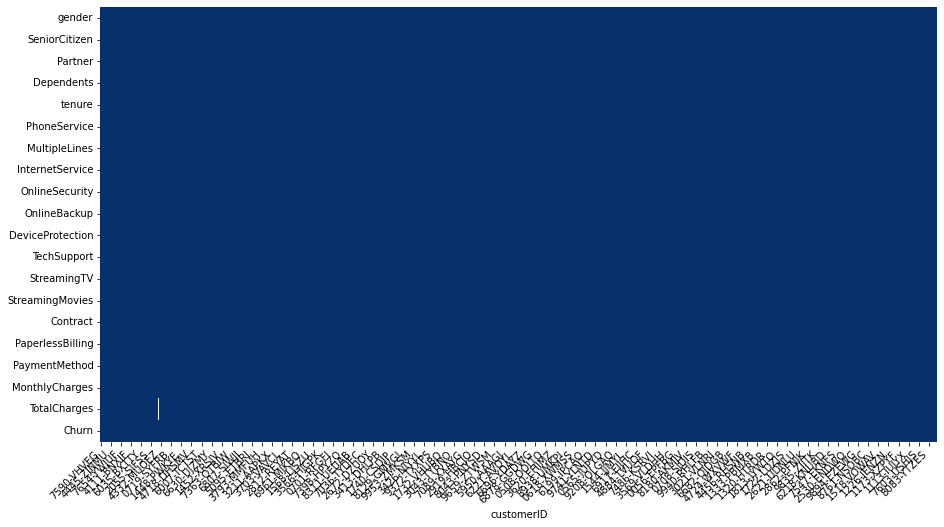

In [15]:
plot_missing_value(df)

```json
Now, the column of TotalCharges have a missing values that will be handled in Pipeline
```

## A. Numerical Features

### Boxplot

In [16]:
numeric = ['tenure', 'MonthlyCharges','TotalCharges']

------------------ TENURE ------------------


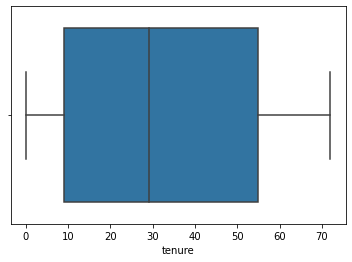

------------------ MONTHLYCHARGES ------------------


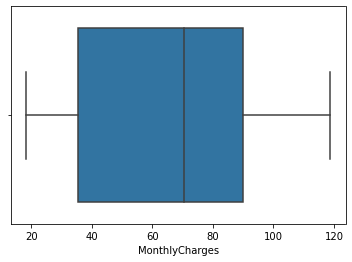

------------------ TOTALCHARGES ------------------


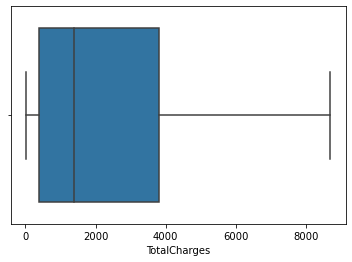

In [17]:
for col in numeric:
    print ('------------------',col.upper(),'------------------')
    sns.boxplot(x = df[col], data=df)
    plt.show()

### Numerical Distribution

------------------ TENURE ------------------


C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


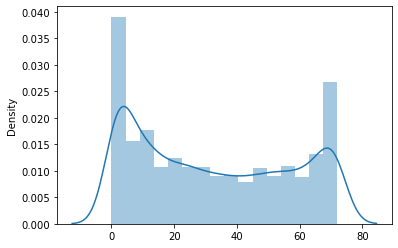

------------------ MONTHLYCHARGES ------------------


C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


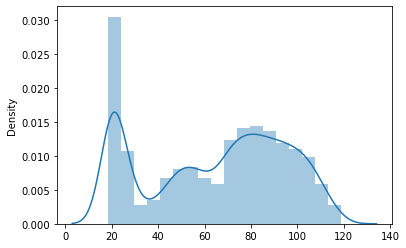

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


------------------ TOTALCHARGES ------------------


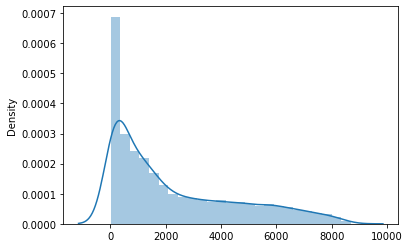

In [18]:
for col in numeric:
    print ('------------------',col.upper(),'------------------')
    sns.distplot(x = df[col])
    plt.show()

## Numeric vs Target

### Boxplot

------------------ TENURE ------------------


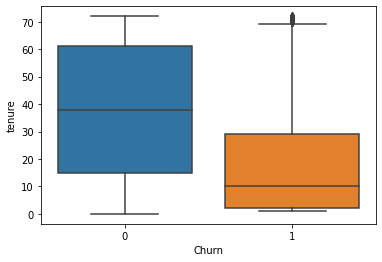

------------------ MONTHLYCHARGES ------------------


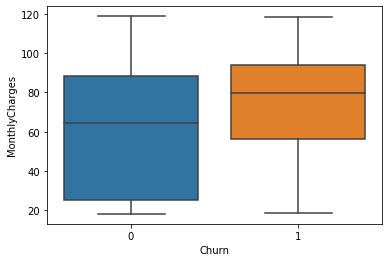

------------------ TOTALCHARGES ------------------


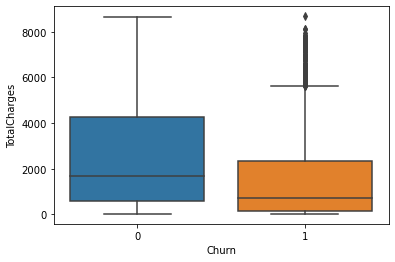

In [19]:
for col in numeric:
    print ('------------------',col.upper(),'------------------')
    sns.boxplot(x= 'Churn', y = df[col], data=df)
    plt.show()

```json
Despite of many columns have outliers, I dont handle them yet because the values might supposed to be like that.
```

### Features Distribution Based on Target

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


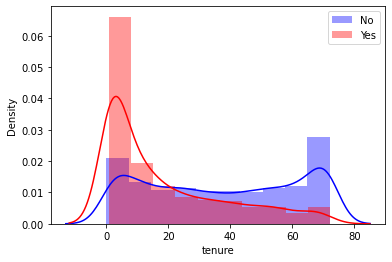

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


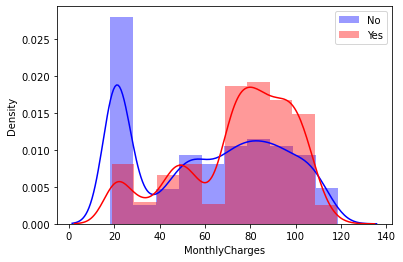

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


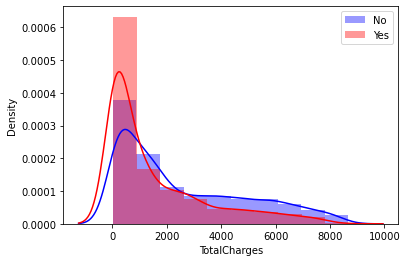

In [20]:
for col in numeric:
    sns.distplot(df[col][df.Churn == 0], bins = 10, label = 'No', color = 'b')
    sns.distplot(df[col][df.Churn == 1], bins = 10, label = 'Yes', color = 'r')
    plt.legend()
    plt.show()

~~~~~~~~~~~~~~~~~~~~~~~~~ TENURE ~~~~~~~~~~~~~~~~~~~~~~~~~


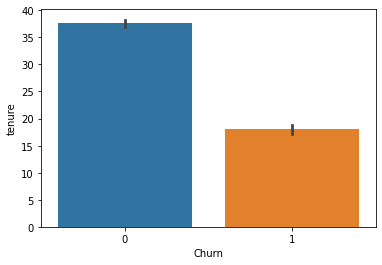

~~~~~~~~~~~~~~~~~~~~~~~~~ MONTHLYCHARGES ~~~~~~~~~~~~~~~~~~~~~~~~~


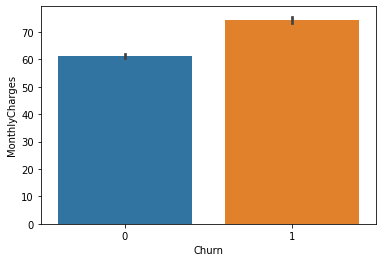

~~~~~~~~~~~~~~~~~~~~~~~~~ TOTALCHARGES ~~~~~~~~~~~~~~~~~~~~~~~~~


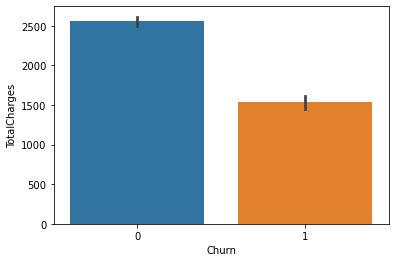

In [21]:
for i in numeric:
    print ('~~~~~~~~~~~~~~~~~~~~~~~~~',i.upper(),'~~~~~~~~~~~~~~~~~~~~~~~~~')
    sns.barplot(x='Churn', y=df[i], data=df)
    plt.show()

### Correlation matrix

In [22]:
from jcopml.plot import plot_correlation_matrix

In [23]:
plot_correlation_matrix(df, target_col= 'Churn', numeric_col=['tenure', 'MonthlyCharges', 'TotalCharges'])

interactive(children=(ToggleButtons(description='method', options=('spearman', 'kendall', 'pearson', 'pearson_…

`Because Github can't display the correlation plot, I've captured a picture of it.`

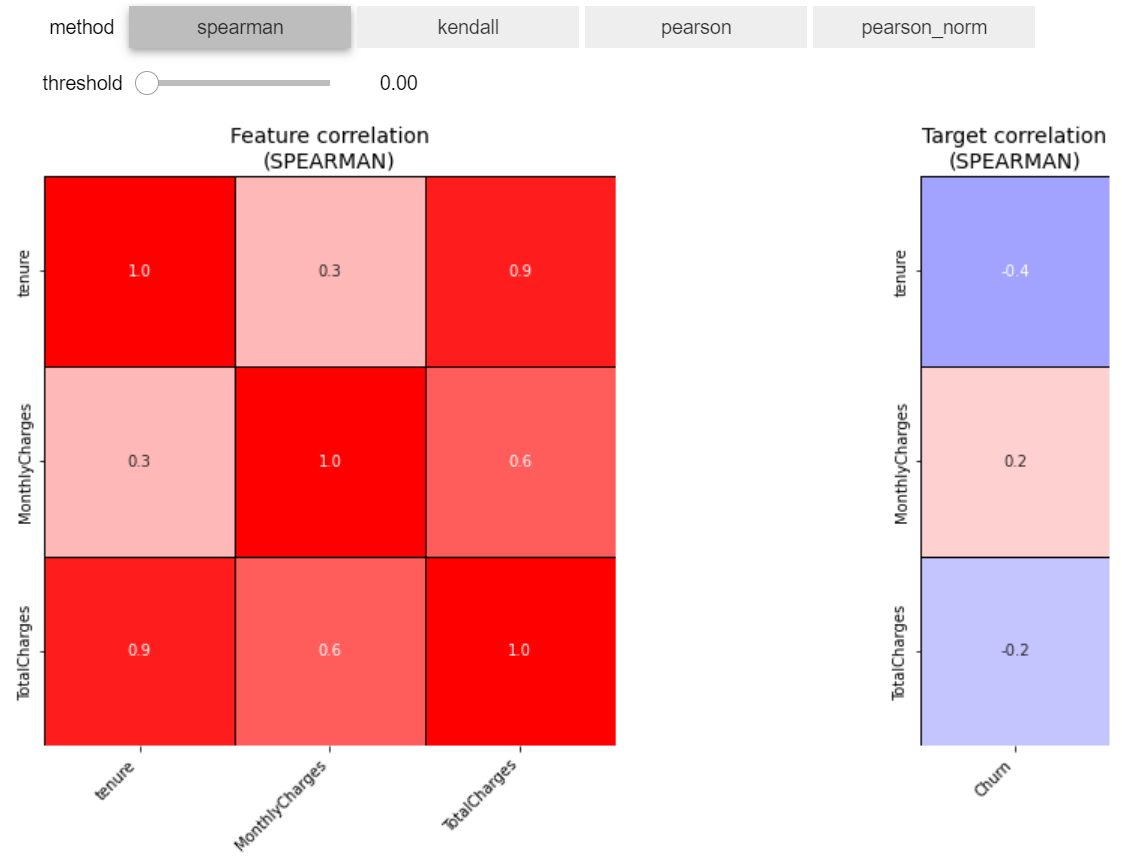

## B. Categorical Features

In [24]:
categoric= ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
            'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

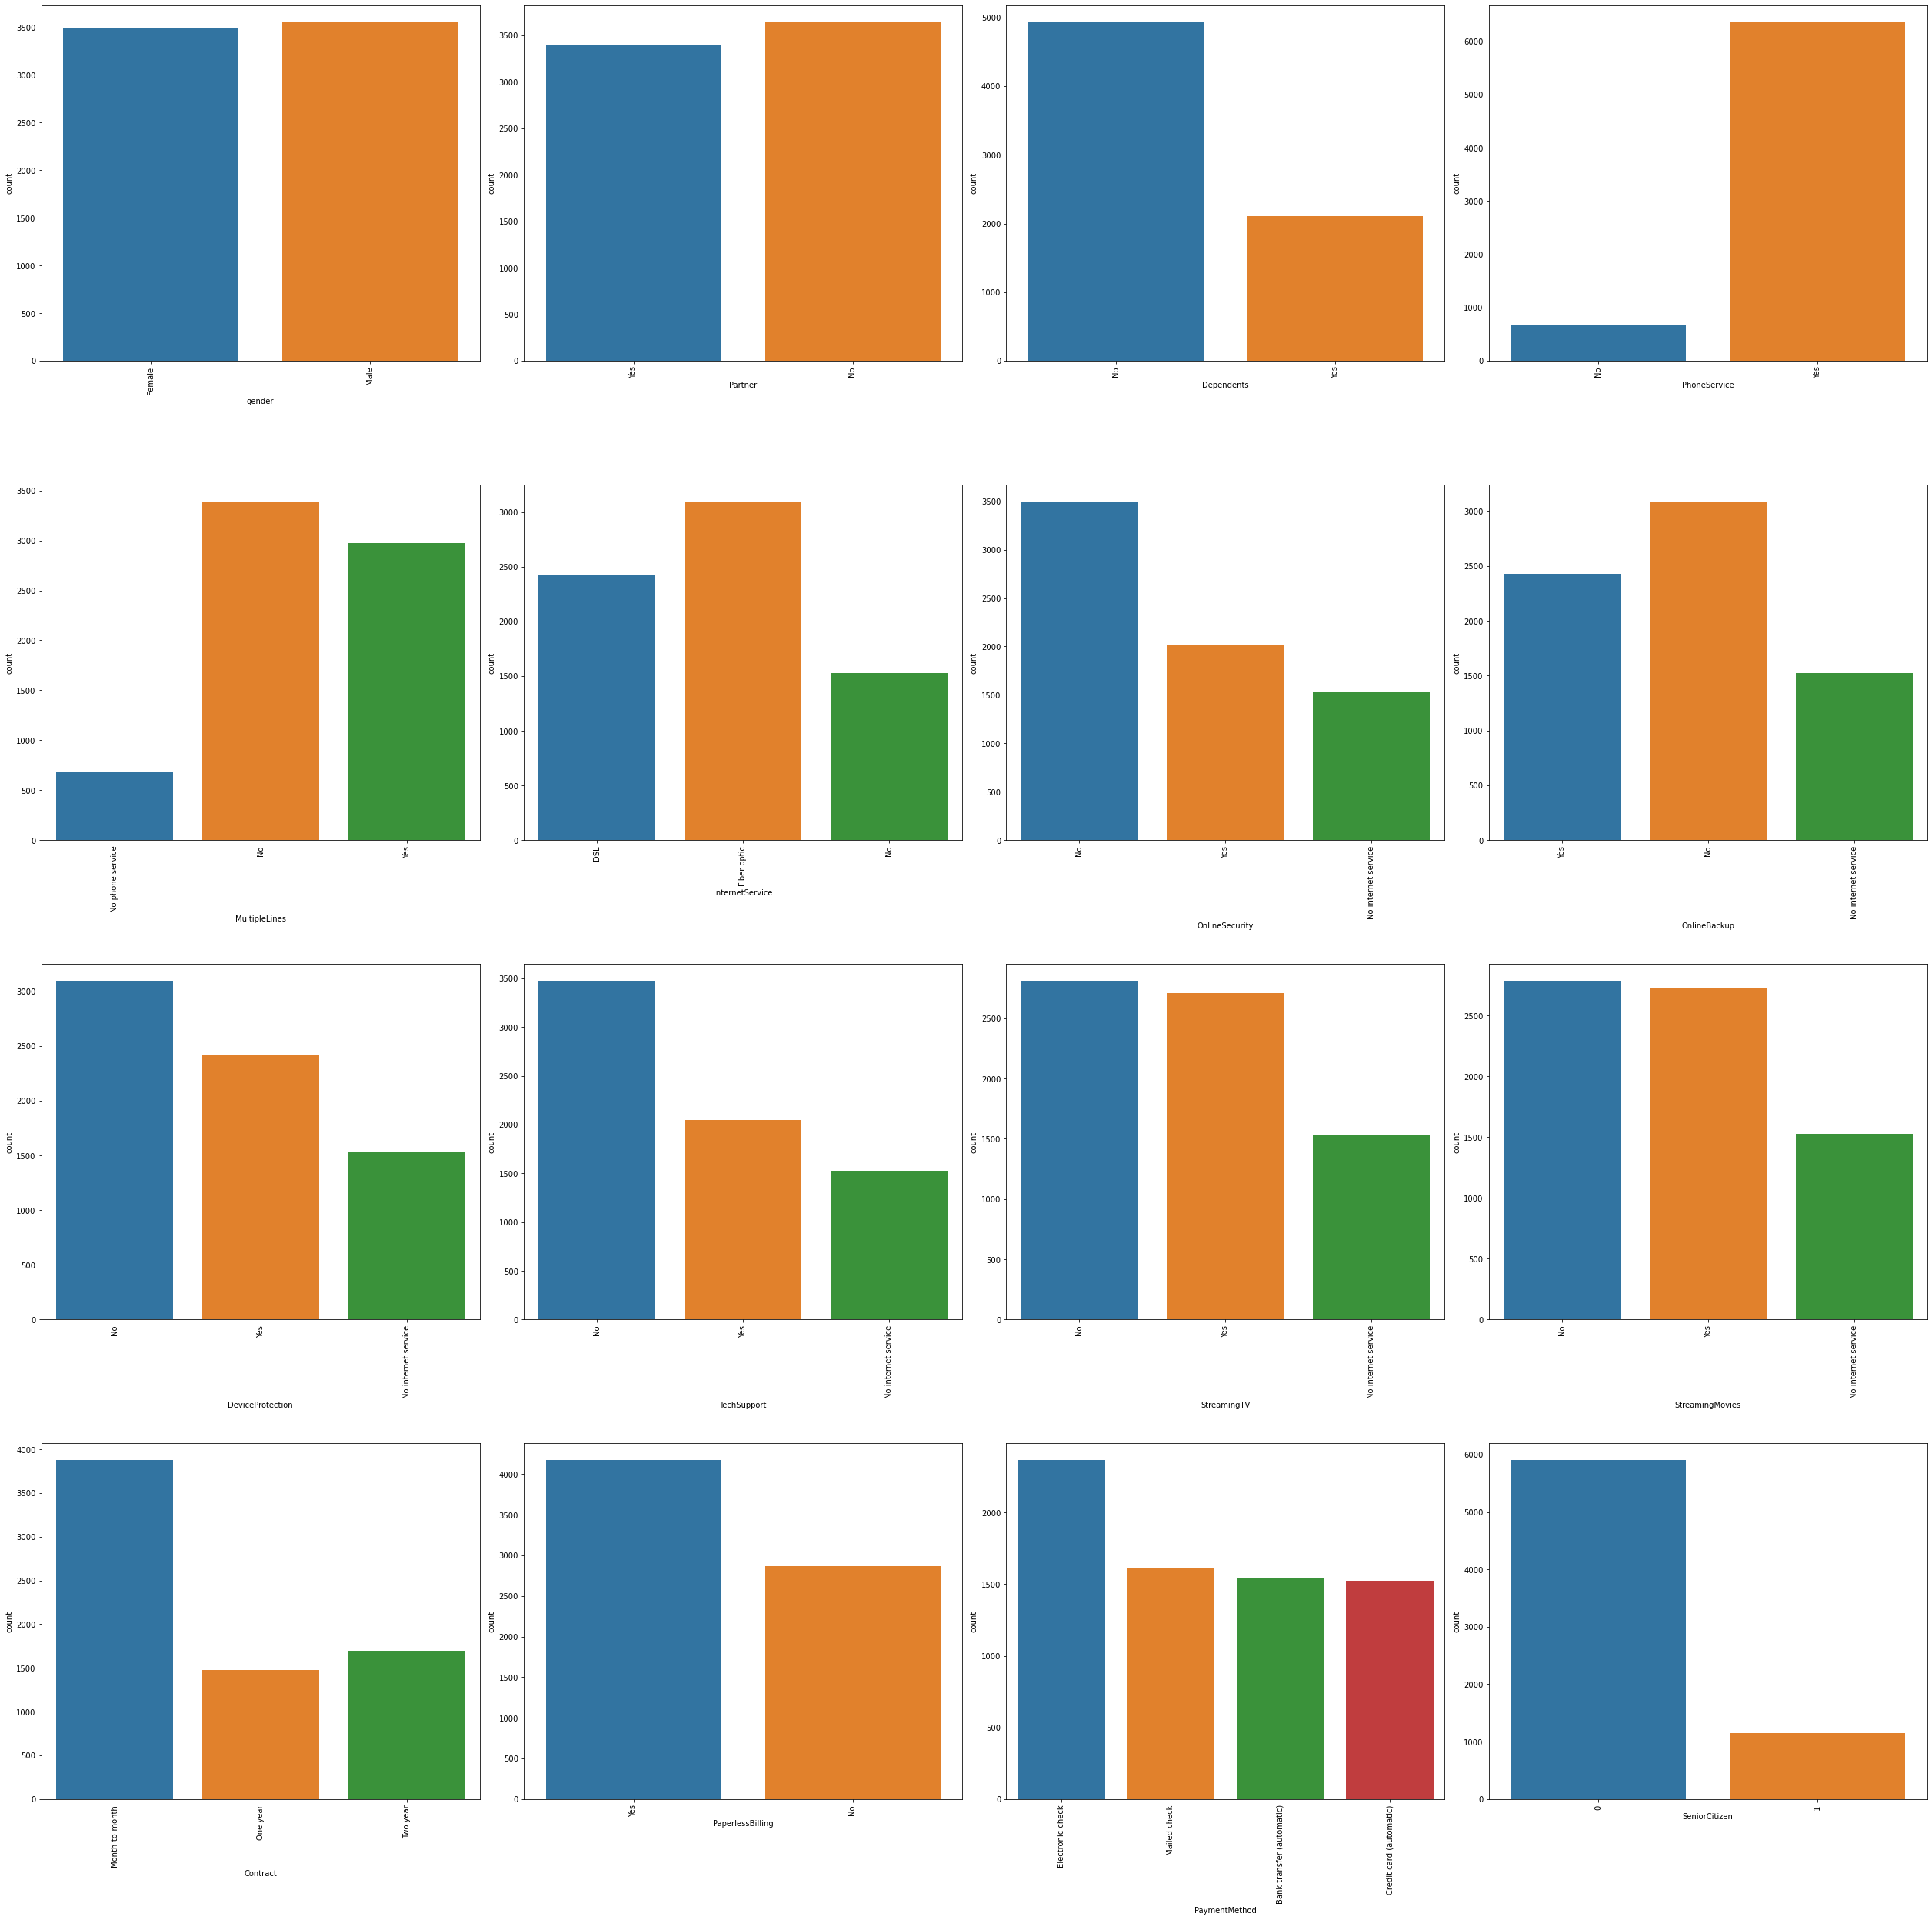

In [25]:
canvas = plt.figure(figsize=(35, 50))

for i, j in enumerate(categoric):
    canvas.add_subplot(6, 4, i+1)
    plot = sns.countplot(df[j])
    plt.setp(plot.get_xticklabels(), rotation=90)
    canvas.tight_layout()

### Categorical distribution based on target

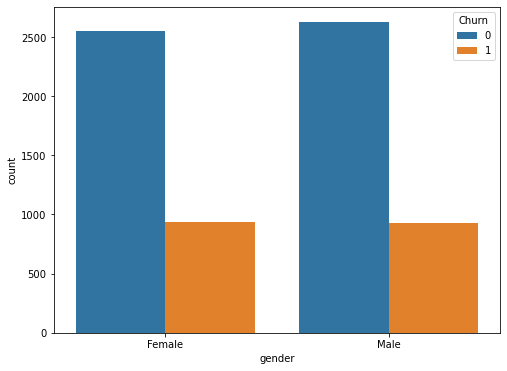

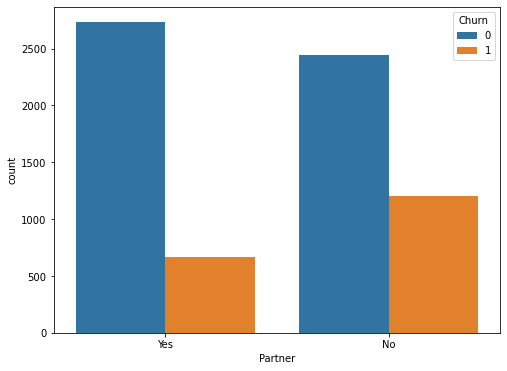

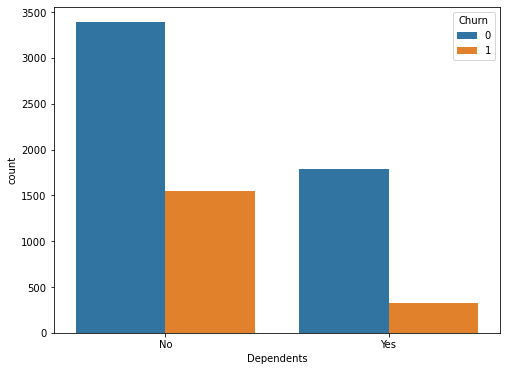

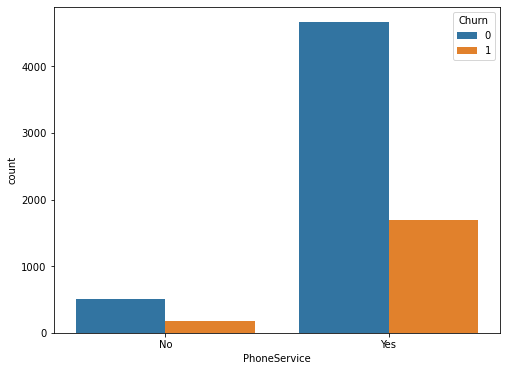

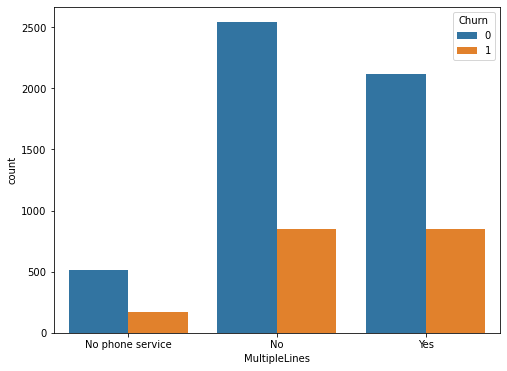

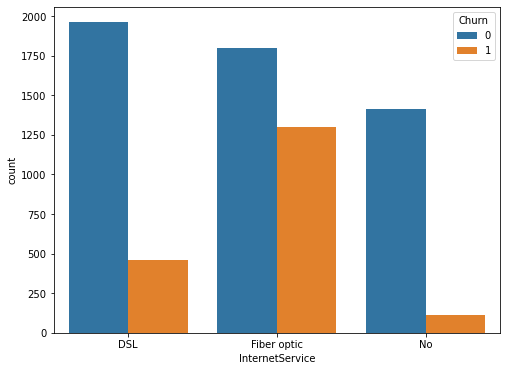

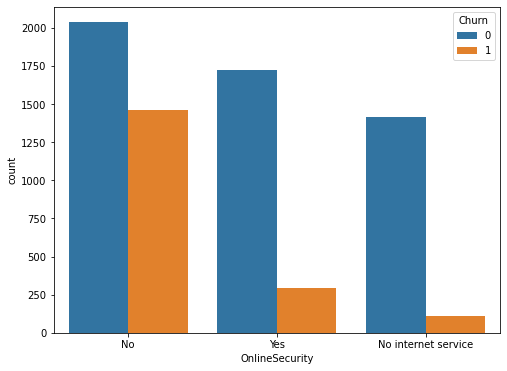

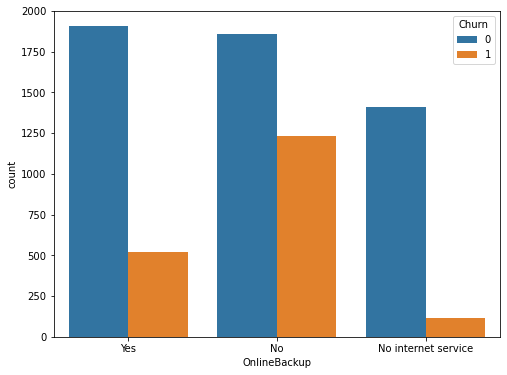

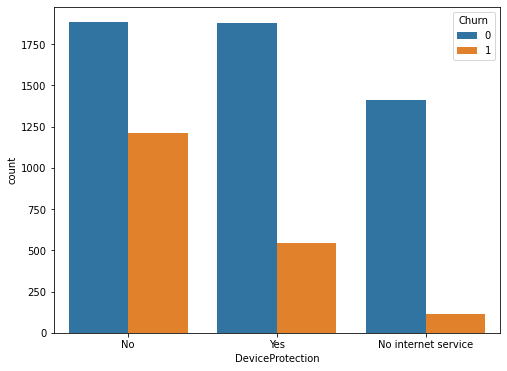

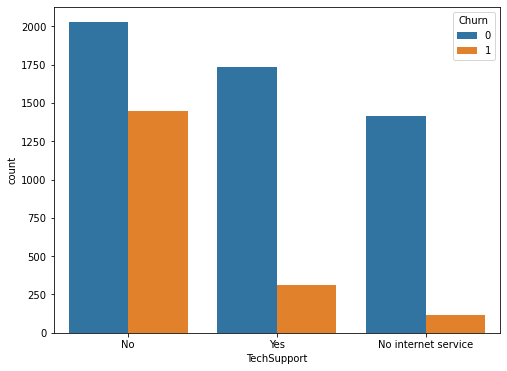

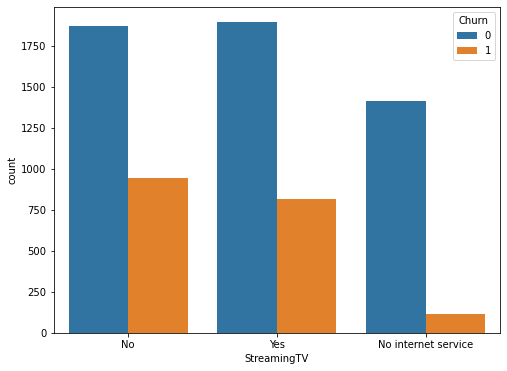

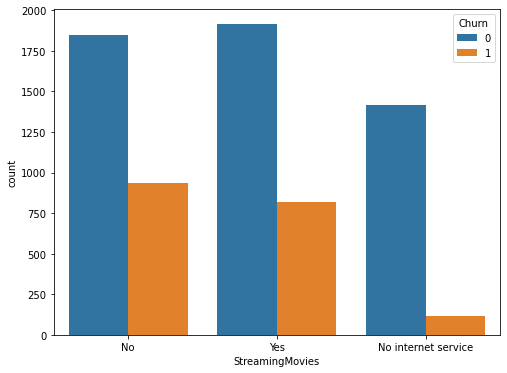

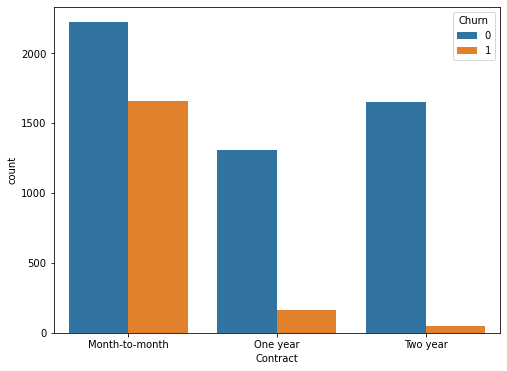

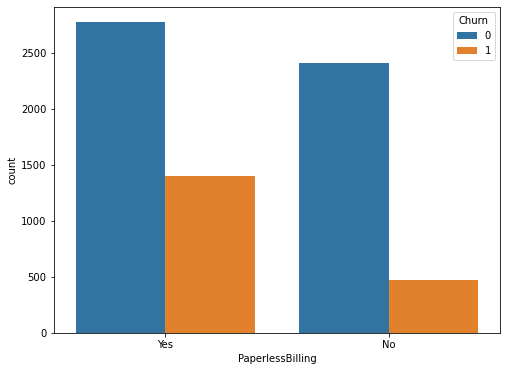

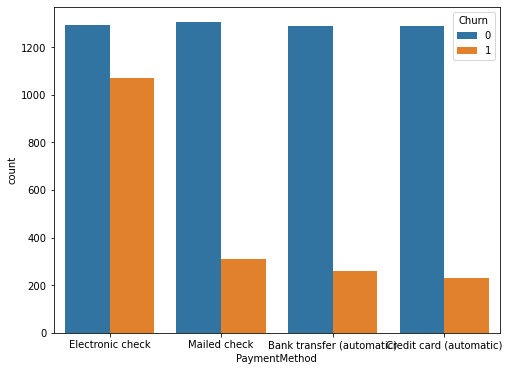

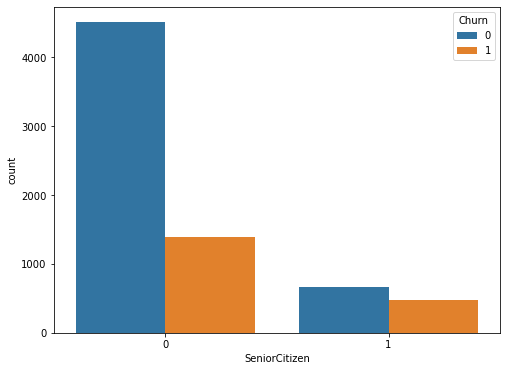

In [26]:
for col in categoric:
    plt.figure(figsize=(8,6))
    sns.countplot(x= df[col], data=df, hue='Churn')
    plt.show()

### Association matrix

In [27]:
from jcopml.plot import plot_association_matrix

In [28]:
plot_association_matrix(df, target_col = 'Churn', categoric_col=categoric)

interactive(children=(ToggleButtons(description='method', options=("Cramer's V", 'Proficiency U(X|Y)', 'Profic…

### Eliminating  column
```json
based on correlation matrix, the column of TotalCharges and tenure have a strong correlation. Thus, I want to eliminate one of both to prevent multicollinearity.
```

In [29]:
df.drop(columns='tenure', inplace = True)

## Check Imbalance Dataset

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

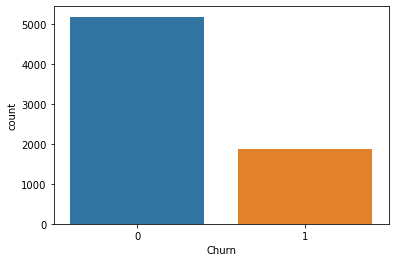

In [30]:
sns.countplot(df.Churn)

In [31]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

`The ratio of the target variable is 0.73:0.26. That means the dataset is slightly balanced. Thus, I'll use 'accuracy' for scoring the model.`

# 4. Dataset Splitting

In [32]:
X = df.drop(columns="Churn")
y = df.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 18), (1409, 18), (5634,), (1409,))

# 5. Modeling

In [33]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [34]:
from jcopml.tuning.space import Integer, Real

In [61]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['MonthlyCharges','TotalCharges']),
    ('categoric', cat_pipe(encoder='onehot'), categoric)
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LGBMClassifier(n_jobs=-1, random_state=42))
])


parameter = {'algo__num_leaves': Integer(low=60, high=300),
            'algo__max_depth': Integer(low=1, high=10),
            'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
            'algo__n_estimators': Integer(low=150, high=300),
            'algo__min_child_samples': Integer(low=10, high=40),
            'algo__min_child_weight': Real(low=-3, high=-2, prior='log-uniform'),
            'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
            'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
            'algo__reg_alpha': Real(low=-1, high=1, prior='log-uniform'),
            'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform'),
}


model = RandomizedSearchCV(pipeline, parameter, cv=3, scoring='accuracy', n_iter= 100, n_jobs=-2, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:  1.4min finished


{'algo__colsample_bytree': 0.8354999801810943, 'algo__learning_rate': 0.1289441439307419, 'algo__max_depth': 1, 'algo__min_child_samples': 11, 'algo__min_child_weight': 0.009914109236071432, 'algo__n_estimators': 289, 'algo__num_leaves': 256, 'algo__reg_alpha': 6.3217324901440275, 'algo__reg_lambda': 0.3407264348530194, 'algo__subsample': 0.46951489552435033}
0.8141640042598509 0.8091941782037629 0.8041163946061036


# 6. Feature Importance

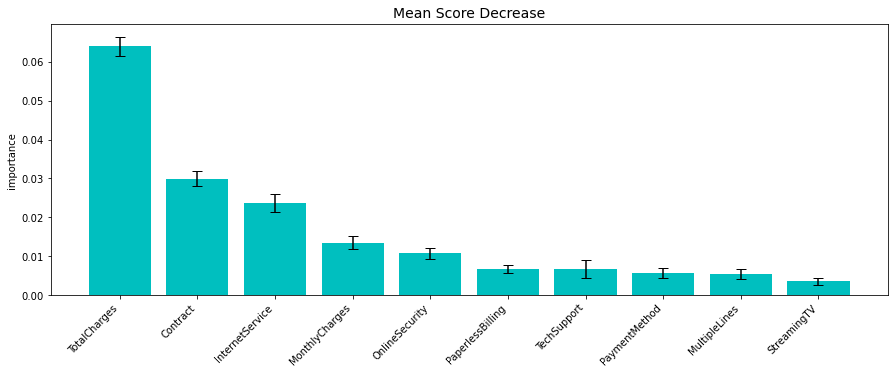

In [35]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=10)

In [36]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['TotalCharges','MonthlyCharges']),
    ('categoric', cat_pipe(encoder='onehot'), ['Contract','InternetService','OnlineSecurity','PaperlessBilling','TechSupport', 
                                              'PaymentMethod', 'MultipleLines','StreamingTV'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LGBMClassifier(n_jobs=-1, random_state=42))
])


parameter = {'algo__num_leaves': Integer(low=60, high=300),
            'algo__max_depth': Integer(low=1, high=10),
            'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
            'algo__n_estimators': Integer(low=150, high=300),
            'algo__min_child_samples': Integer(low=10, high=40),
            'algo__min_child_weight': Real(low=-3, high=-2, prior='log-uniform'),
            'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
            'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
            'algo__reg_alpha': Real(low=-1, high=1, prior='log-uniform'),
            'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform'),
}


model = RandomizedSearchCV(pipeline, parameter, cv=3, scoring='accuracy', n_iter= 100, n_jobs=-2, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  58 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:   15.4s finished


{'algo__colsample_bytree': 0.10496990541124217, 'algo__learning_rate': 0.42748694552952193, 'algo__max_depth': 1, 'algo__min_child_samples': 17, 'algo__min_child_weight': 0.005358055009231867, 'algo__n_estimators': 182, 'algo__num_leaves': 182, 'algo__reg_alpha': 0.1406336677771817, 'algo__reg_lambda': 0.0271558195528294, 'algo__subsample': 0.35793452976256485}
0.8125665601703941 0.8093716719914803 0.801277501774308


# 7. Polynomial Features

In [38]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2), ['MonthlyCharges','TotalCharges']),
    ('categoric', cat_pipe(encoder='onehot'), categoric)
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LGBMClassifier(n_jobs=-1, random_state=42))
])

parameter = {'prep__numeric__poly__degree': Integer(low=1, high=3),
             'prep__numeric__poly__interaction_only': [True, False],
             'algo__num_leaves': Integer(low=60, high=300),
             'algo__max_depth': Integer(low=1, high=10),
             'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
             'algo__n_estimators': Integer(low=150, high=300),
             'algo__min_child_samples': Integer(low=10, high=40),
             'algo__min_child_weight': Real(low=-3, high=-2, prior='log-uniform'),
             'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
             'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
             'algo__reg_alpha': Real(low=-1, high=1, prior='log-uniform'),
             'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform'),
}

model = RandomizedSearchCV(pipeline, parameter, cv=3, scoring='accuracy', n_iter= 100, n_jobs=-2, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:   34.9s finished


{'algo__colsample_bytree': 0.8110122029126705, 'algo__learning_rate': 0.24050298162586645, 'algo__max_depth': 1, 'algo__min_child_samples': 24, 'algo__min_child_weight': 0.0012209706147788238, 'algo__n_estimators': 229, 'algo__num_leaves': 275, 'algo__reg_alpha': 3.286887410036356, 'algo__reg_lambda': 0.35958166690720494, 'algo__subsample': 0.679517922769425, 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': False}
0.8139865104721334 0.8090166844160455 0.8034066713981547


# 8. Hyperparameter Tuning

In [36]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['MonthlyCharges','TotalCharges']),
    ('categoric', cat_pipe(encoder='onehot'), categoric)
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LGBMClassifier(n_jobs=-1, random_state=42))
])


parameter = {'algo__num_leaves': Integer(low=60, high=300),
            'algo__max_depth': Integer(low=1, high=10),
            'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
            'algo__n_estimators': Integer(low=150, high=300),
            'algo__min_child_samples': Integer(low=10, high=40),
            'algo__min_child_weight': Real(low=-3, high=-2, prior='log-uniform'),
            'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
            'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
            'algo__reg_alpha': Real(low=-4, high=1, prior='log-uniform'),
            'algo__reg_lambda': Real(low=-3, high=2, prior='log-uniform'),
}


model = RandomizedSearchCV(pipeline, parameter, cv=3, scoring='accuracy', n_iter= 100, n_jobs=-2, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:   26.5s finished


{'algo__colsample_bytree': 0.909700700762956, 'algo__learning_rate': 0.1770936904822507, 'algo__max_depth': 1, 'algo__min_child_samples': 32, 'algo__min_child_weight': 0.00274627912266098, 'algo__n_estimators': 294, 'algo__num_leaves': 284, 'algo__reg_alpha': 0.009065892206865909, 'algo__reg_lambda': 0.456338802528649, 'algo__subsample': 0.3333095561954085}
0.8141640042598509 0.8093716719914803 0.808374733853797


# 9. Evaluation

In [37]:
from jcopml.plot import plot_classification_report, plot_confusion_matrix, plot_roc_curve, plot_pr_curve

## 9.1 Classification Report

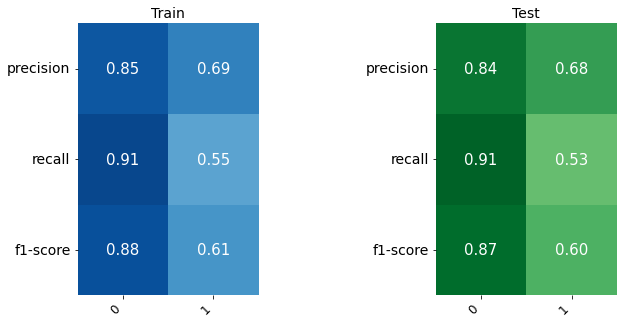

In [38]:
plot_classification_report(X_train, y_train, X_test, y_test, model)

In [39]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4139
           1       0.69      0.55      0.61      1495

    accuracy                           0.81      5634
   macro avg       0.77      0.73      0.74      5634
weighted avg       0.81      0.81      0.81      5634


Test report
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.68      0.53      0.60       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



## 9.2 Precision-Recall Curve

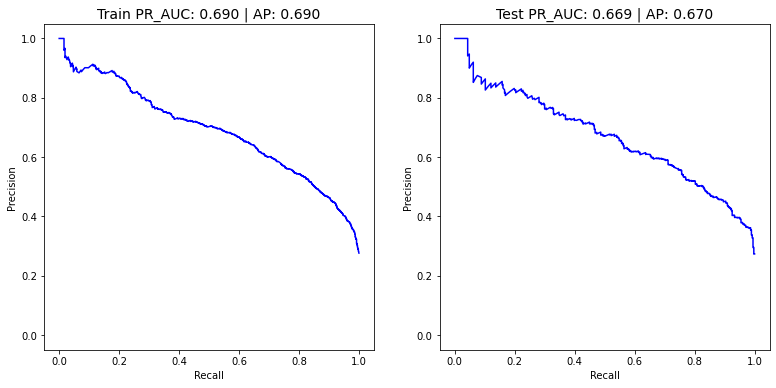

In [40]:
plot_pr_curve(X_train, y_train, X_test, y_test, model)

## 9.3 ROC AUC Curve

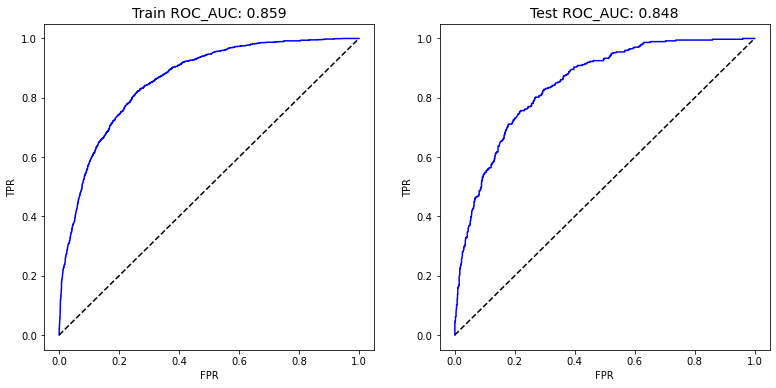

In [41]:
plot_roc_curve(X_train, y_train, X_test, y_test, model)

## 9.4 Confusion Matrix

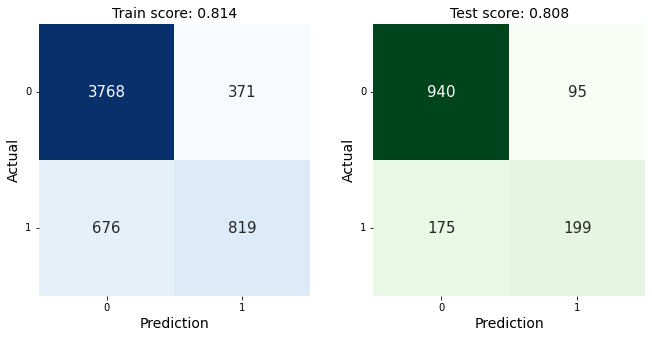

In [42]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

# Save Model

In [43]:
save_model(model.best_estimator_, 'Telco_Customer_Churn_LGBM_Classifier.pkl')

Model is pickled as model/Telco_Customer_Churn_LGBM_Classifier.pkl
